# K-NN Classification (Non-Engineered)

Non-Engineered refers to no data balancing, no feature engineering and no feature scaling performed. This is used mostly as a base template to compare the effects of data & feature engineering.

# 1) Data Preprocessing

## Import Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import time

## Import Dataset

In [38]:
dataset = pd.read_csv('C:/Users/LM/Desktop/NUS Documents/School Notes/Python/PythonCA/data.csv')
x = dataset.iloc[:, 2:30].values
y = dataset.iloc[:, 1].values

## Split into test and training dataset

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

## Check for k-value providing highest accuracy score

In [40]:
kVal = 0
maxAc = 0
for i in range(1, 30, 2):
    kClass = KNeighborsClassifier(n_neighbors=i)
    kClass.fit(x_train, y_train)
    ac = accuracy_score(y_test, kClass.predict(x_test))
    if ac > maxAc:
        maxAc = ac
        kVal = i
    else:
        pass
print(kVal)

5


# 2) Data Visualization

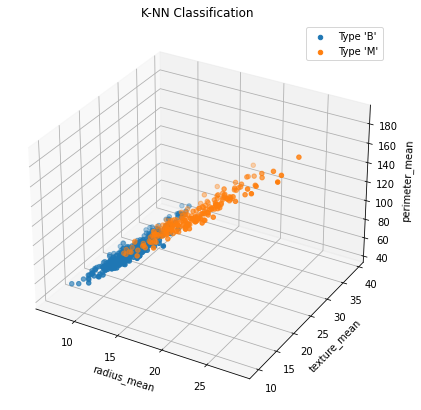

In [41]:
# Show graph (Training data)
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# Display only first 3 features
for i in np.unique(y):
    ax.scatter3D(xs=x[y == i, 0],
                 ys=x[y == i, 1],
                 zs=x[y == i, 2],
                 label='Type ' + repr(i))

plt.title('K-NN Classification')
ax.set_xlabel(dataset.columns[2])
ax.set_ylabel(dataset.columns[3])
ax.set_zlabel(dataset.columns[4])
plt.legend()
plt.show()

# 3) Modelling

## Train K-NN model on dataset

In [42]:
# Time-check (Training start time)
train_start = time.time()

# Train K-NN Model on Training set
classifier = KNeighborsClassifier(n_neighbors=kVal)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
# Time-check (Training end time)
train_end = time.time()
print("Training duration =", train_end - train_start)

Training duration = 0.01839470863342285


## Predict test results using test dataset

In [44]:
# Time-check (Testing start time)
test_start = time.time()

# Predict Test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['M' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'M']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']

In [45]:
# Time-check (Testing end time)
test_end = time.time()
print("Test duration =", test_end - test_start)

Test duration = 0.027944564819335938


# 4) Check Model Performance

## Compute Confusion matrix and Accuracy Score

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',ac)

[[84  4]
 [ 5 50]]
Accuracy Score:  0.9370629370629371
